<a href="https://colab.research.google.com/github/MehrdadJalali-KIT/Statistics-and-Machine-Learning/blob/main/C1_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Application of Statistics**

**Healthcare: Clinical Trials**
"This example demonstrates hypothesis testing in the context of clinical trials to determine the efficacy of a new drug compared to a placebo. We use an independent samples t-test to compare the effectiveness scores from two groups. If the p-value is less than 0.05, it suggests significant differences, indicating the drug's potential efficacy."

In [ ]:
import scipy.stats as stats

# Sample data: Drug vs Placebo
drug_effectiveness = [62, 60, 67, 55, 58]
placebo_effectiveness = [45, 40, 50, 43, 47]

# Perform a t-test
t_stat, p_value = stats.ttest_ind(drug_effectiveness, placebo_effectiveness)
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 5.837354935557555
P-value: 0.00038830752430204954


**Healthcare: Survival Analysis**
"In this cell, we perform survival analysis using the Kaplan-Meier estimator, which is a non-parametric statistic used to estimate the survival function from lifetime data. In this context, we analyze the time until a particular event (e.g., death) occurs. The output plot shows the survival function over time."

In [ ]:
pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=c65fbc7037b2d0497319a282c6cebf74fe811a6c7371b92c2586cc74f9cf2506
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


Survival function at specific times:           KM_estimate
timeline             
0.0          1.000000
2.5          0.833333
4.0          0.500000
5.0          0.333333
6.0          0.333333


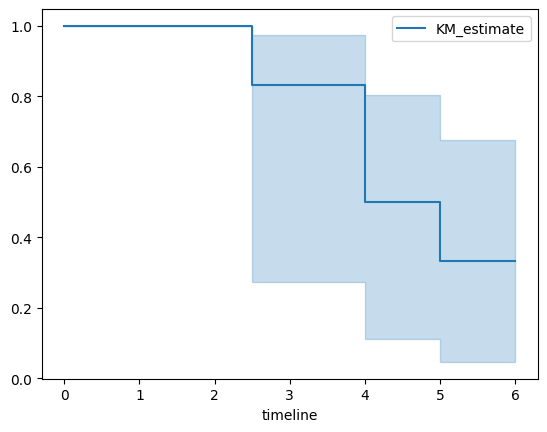

In [ ]:
from lifelines import KaplanMeierFitter

# Sample data
durations = [5, 6, 6, 2.5, 4, 4]
event_observed = [1, 0, 0, 1, 1, 1]  # 1 if event/death observed, 0 if censored

kmf = KaplanMeierFitter()
kmf.fit(durations, event_observed)

# Plot survival function
kmf.plot_survival_function()
print("Survival function at specific times:", kmf.survival_function_.head())


**Finance: Cryptocurrency Analysis** :"This code snippet demonstrates the use of ARIMA models to analyze time series data of cryptocurrency prices. The goal is to model price fluctuations over time, allowing predictions about future prices based on past trends. The summary from the ARIMA model provides detailed statistics about the model's performance."

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Ensure the data is numeric and contains no missing values
price_data = pd.Series([45500, 46000, 46500, 45000, 44500, 46000, 47000], dtype=float)

# Check if any values are missing
if price_data.isna().any():
    print("Data contains NaNs. Please fill or remove.")
else:
    # Fit an ARIMA model
    model = ARIMA(price_data, order=(1, 1, 1))
    model_fit = model.fit()

    # Summary of the model
    print(model_fit.summary())



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    7
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -49.931
Date:                Wed, 21 Aug 2024   AIC                            105.862
Time:                        08:45:01   BIC                            105.237
Sample:                             0   HQIC                           103.361
                                  - 7                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1131      4.605      0.025      0.980      -8.912       9.138
ma.L1         -0.0889      4.782     -0.019      0.985      -9.462       9.284
sigma2      9.882e+05   1.09e+06      0.906      0.3

**Finance: Risk Assessment**
"Here, we calculate the Value at Risk (VaR) for a portfolio using historical returns data. VaR is a statistical measure that estimates the level of financial risk within a firm or investment portfolio over a specific time frame. The result shows the maximum expected loss at a 95% confidence level over the given data period."

In [ ]:
import numpy as np

# Sample returns data
returns = np.random.normal(0.05, 0.1, 100)  # mean, std, number of points

# Calculate Value at Risk (VaR) at 95% confidence level
VaR_95 = np.percentile(returns, 5)
print("Value at Risk (95% confidence):", VaR_95)


Value at Risk (95% confidence): -0.1240051035930233


**Blockchain: Fraud Detection**
"In this example, we analyze transaction data to detect potential frauds or anomalies using a simple statistical approach. By applying the 3 standard deviations rule, we identify transactions that are unusually large compared to typical transaction sizes, which could indicate fraudulent activity."

In [ ]:
import numpy as np

# Simulated transaction amounts
transactions = np.random.exponential(scale=2, size=1000)  # Scale is average transaction size

# Detect outliers using 3 standard deviations rule
mean_trans = np.mean(transactions)
std_trans = np.std(transactions)

outliers = [x for x in transactions if x > mean_trans + 3 * std_trans]
print("Detected outliers:", outliers)


Detected outliers: [19.849638955554628, 9.63929039911661, 12.789824762491095, 13.420318988228304, 7.6244768538893135, 7.9404783163235235, 13.420805082668627, 9.094597244346177, 8.69093493619807, 8.453076964592992, 7.525273579344735, 8.967589735579685, 9.529376922866367, 9.13826677600747, 9.11119622623604, 8.002084085654122]


**Blockchain: Consensus Algorithms**

"This code illustrates how to model the probability of achieving consensus in a blockchain network using a simple probability calculation. The scenario considers a network where each node independently agrees to a new block with a certain probability. We calculate the likelihood that the required level of agreement is met."

In [ ]:
# Simple probability model for decision making in a blockchain consensus
def consensus_prob(num_nodes, required=0.6):
    from scipy.stats import binom
    # Probability of a node agreeing
    prob_agree = 0.8
    # Calculate the probability of achieving required consensus
    prob_consensus = 1 - binom.cdf(k=int(required * num_nodes), n=num_nodes, p=prob_agree)
    return prob_consensus

# Example: Probability of consensus with 10 nodes
print("Probability of achieving consensus:", consensus_prob(10))


Probability of achieving consensus: 0.8791261184000001


**Introduction to Infrared (IR) Spectroscopy**
Infrared (IR) Spectroscopy is a vital analytical technique used to identify substances and investigate chemical compositions based on how molecules absorb infrared light. Different molecular bonds absorb characteristic wavelengths of infrared radiation, creating unique spectral fingerprints. This method is widely used for qualitative analysis in various fields such as chemistry, material science, and pharmaceuticals.

**Benefits of Synthetic Data Generation for IR Spectroscopy**
Generating synthetic IR spectroscopy data is beneficial for testing and developing analytical algorithms, training machine learning models, and educational purposes when real data is unavailable or expensive to obtain. The code provided simulates a realistic IR spectrum using Gaussian functions to represent absorption peaks and includes noise to mimic real measurement conditions. By studying these synthetic spectra, researchers can enhance their understanding and interpretation skills without the immediate need for laboratory resources.

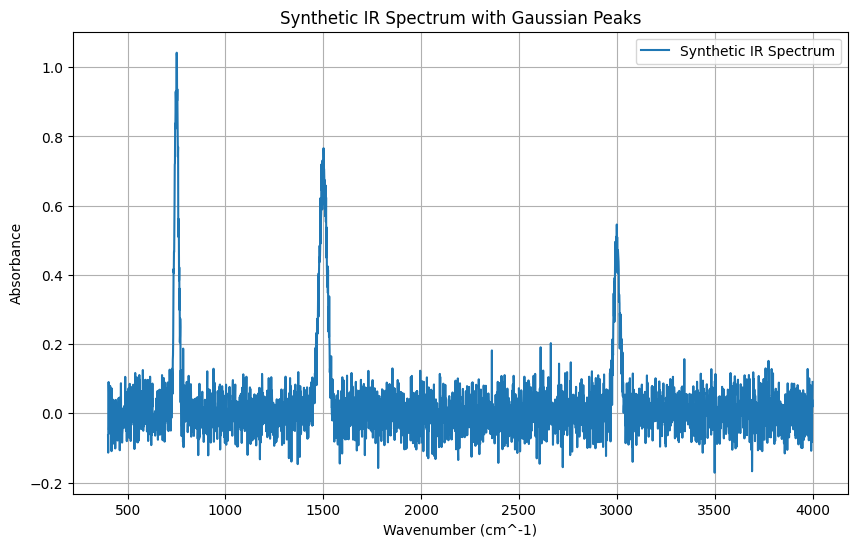

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, amplitude, mean, stddev):
    """Returns a Gaussian (normal distribution) curve."""
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

# Parameters for synthetic data generation
wavenumbers = np.linspace(400, 4000, 3600)  # Simulated range of wavenumbers from 400 to 4000 cm^-1
peaks = [
    {'amplitude': 1.0, 'mean': 750, 'stddev': 10},   # Example peak at 750 cm^-1
    {'amplitude': 0.7, 'mean': 1500, 'stddev': 20},  # Example peak at 1500 cm^-1
    {'amplitude': 0.5, 'mean': 3000, 'stddev': 15},  # Example peak at 3000 cm^-1
]

# Generate synthetic spectrum by adding Gaussian peaks
spectrum = np.zeros_like(wavenumbers)
for peak in peaks:
    spectrum += gaussian(wavenumbers, **peak)

# Adding random noise to the spectrum
noise = np.random.normal(0, 0.05, spectrum.shape)
spectrum += noise

# Plotting the synthetic spectrum
plt.figure(figsize=(10, 6))
plt.plot(wavenumbers, spectrum, label='Synthetic IR Spectrum')
plt.title('Synthetic IR Spectrum with Gaussian Peaks')
plt.xlabel('Wavenumber (cm^-1)')
plt.ylabel('Absorbance')
plt.legend()
plt.grid(True)
plt.show()


**Handling Categorical and Numerical Data with Pandas in Python.** In the Python example provided, we use the pandas library to create and manipulate a DataFrame containing both categorical and numerical data. Initially, we establish a DataFrame with columns representing Gender, Blood Type, Age, and Income. To efficiently manage categorical data, we convert the Gender and Blood Type columns from strings to categorical data types. This conversion is not only memory-efficient but also optimizes performance for operations like sorting and grouping. We then demonstrate the distinction between data types by displaying the types of each column. Additionally, we perform basic categorical data manipulations, such as counting the number of occurrences of each category within the Gender and Blood Type columns, illustrating practical data analysis tasks that can be performed with pandas. This example highlights essential techniques for differentiating and handling categorical and numerical data in data science projects.

In [11]:
import pandas as pd

# Create a sample DataFrame
data = {
    'Gender': ['Male', 'Female', 'Female', 'Male'],
    'Blood Type': ['A', 'B', 'AB', 'O'],
    'Age': [25, 30, 35, 40],
    'Income': [50000, 60000, 70000, 80000]
}
df = pd.DataFrame(data)

# Print the original DataFrame
print("Original DataFrame:")
print(df)
print()

# Convert 'Gender' and 'Blood Type' to categorical data types
df['Gender'] = df['Gender'].astype('category')
df['Blood Type'] = df['Blood Type'].astype('category')

# Display data types to differentiate between categorical and numerical data
print("Data Types after Conversion:")
print(df.dtypes)
print()

# Example of manipulating categorical data: count unique categories
print("Count of Unique Categories in Gender:")
print(df['Gender'].value_counts())
print()

print("Count of Unique Categories in Blood Type:")
print(df['Blood Type'].value_counts())


Original DataFrame:
   Gender Blood Type  Age  Income
0    Male          A   25   50000
1  Female          B   30   60000
2  Female         AB   35   70000
3    Male          O   40   80000

Data Types after Conversion:
Gender        category
Blood Type    category
Age              int64
Income           int64
dtype: object

Count of Unique Categories in Gender:
Gender
Female    2
Male      2
Name: count, dtype: int64

Count of Unique Categories in Blood Type:
Blood Type
A     1
AB    1
B     1
O     1
Name: count, dtype: int64


**Analyzing and Visualizing Central Tendencies in Python**
This Python example demonstrates how to compute and visualize the central tendencies—mean, median, and mode—of a dataset using the libraries NumPy, pandas, and matplotlib. We begin by creating an array of numeric values. Using NumPy, we calculate the mean and median, and with SciPy's stats module, we determine the mode.

Mean:  26.333333333333332
Median:  25.0
Mode:  24


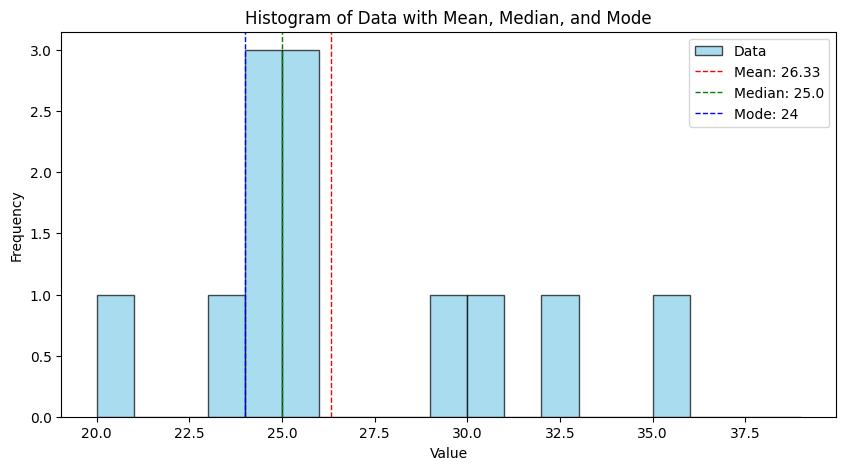

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Create a sample dataset
data = np.array([23, 24, 29, 20, 32, 25, 25, 30, 24, 35, 24, 25])

# Calculate measures of central tendency
mean_value = np.mean(data)
median_value = np.median(data)
mode_result = stats.mode(data)
mode_value = mode_result.mode  # Access the mode value directly

# Print the results
print("Mean: ", mean_value)
print("Median: ", median_value)
print("Mode: ", mode_value)

# Creating a DataFrame for easier visualization
df = pd.DataFrame(data, columns=['Data'])

# Plotting the data
plt.figure(figsize=(10, 5))
plt.hist(data, bins=range(20, 40), color='skyblue', alpha=0.7, label='Data', edgecolor='black')
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value}')
plt.axvline(mode_value, color='blue', linestyle='dashed', linewidth=1, label=f'Mode: {mode_value}')

plt.title('Histogram of Data with Mean, Median, and Mode')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**Analyzing and Visualizing Measures of Dispersion in Python**
This Python example illustrates how to compute the measures of dispersion—variance, standard deviation, and range—for a dataset using the NumPy library. We begin by generating a set of numeric values which serves as our data. Using NumPy, we calculate the variance to gauge the average squared deviations from the mean, the standard deviation to measure the average distance of data points from the mean, and the range to determine the spread between the smallest and largest values. To visually represent these dispersion metrics, we plot a histogram and overlay lines indicating the mean and standard deviations. This visualization is instrumental in understanding the spread and distribution of the data, providing insights into the variability of the dataset.

Variance:  16.72222222222222
Standard Deviation:  4.089281382128433
Range:  15


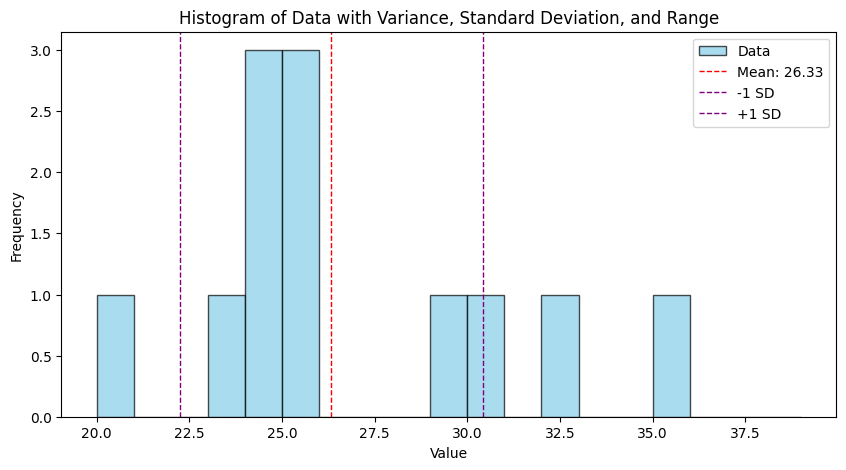

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample dataset
data = np.array([23, 24, 29, 20, 32, 25, 25, 30, 24, 35, 24, 25])

# Calculate measures of dispersion
variance = np.var(data)
standard_deviation = np.sqrt(variance)
data_range = np.max(data) - np.min(data)

# Print the results
print("Variance: ", variance)
print("Standard Deviation: ", standard_deviation)
print("Range: ", data_range)

# Creating a DataFrame for easier visualization
df = pd.DataFrame(data, columns=['Data'])

# Plotting the data
plt.figure(figsize=(10, 5))
plt.hist(data, bins=range(20, 40), color='skyblue', alpha=0.7, label='Data', edgecolor='black')
plt.axvline(np.mean(data), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(data):.2f}')
plt.axvline(np.mean(data) - standard_deviation, color='purple', linestyle='dashed', linewidth=1, label=f'-1 SD')
plt.axvline(np.mean(data) + standard_deviation, color='purple', linestyle='dashed', linewidth=1, label=f'+1 SD')

plt.title('Histogram of Data with Variance, Standard Deviation, and Range')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## Variance and Standard Deviation in Portfolio Management

### Overview:
This notebook demonstrates the application of variance and standard deviation to assess the risk associated with stock investments. We use Python to calculate these metrics for two stocks based on their monthly returns.

### Purpose:
- **Variance** and **Standard Deviation** are key statistical tools used in finance to measure stock return volatility, which indicates risk level.
- Higher values suggest greater risk, which can influence investment decisions.

### Method:
1. **Data Setup**: Two stocks with six months of return data.
2. **Calculations**:
   - Compute the mean, variance, and standard deviation for each stock.
   - Analyze these metrics to compare the investment risks.

### Conclusion:
Understanding these statistics helps investors manage portfolio risk effectively, guiding decisions on which stocks might best fit their risk tolerance and investment goals.


In [12]:
import numpy as np

# Monthly returns (in percentage)
returns_a = np.array([7, 8, 5, 10, 6, 7])
returns_b = np.array([-2, 3, 10, 5, 0, 2])

# Calculating the mean
mean_a = np.mean(returns_a)
mean_b = np.mean(returns_b)

# Variance and Standard Deviation
variance_a = np.var(returns_a)
variance_b = np.var(returns_b)
std_dev_a = np.sqrt(variance_a)
std_dev_b = np.sqrt(variance_b)

print(f"Stock A - Mean: {mean_a:.2f}%, Variance: {variance_a:.2f}, Standard Deviation: {std_dev_a:.2f}")
print(f"Stock B - Mean: {mean_b:.2f}%, Variance: {variance_b:.2f}, Standard Deviation: {std_dev_b:.2f}")


Stock A - Mean: 7.17%, Variance: 2.47, Standard Deviation: 1.57
Stock B - Mean: 3.00%, Variance: 14.67, Standard Deviation: 3.83


## Analysis of Team Score Variability

### Overview:
This notebook demonstrates how a higher standard deviation in game scores might indicate a sports team's potential to perform exceptionally well under certain conditions.

### Purpose:
- **Standard Deviation** serves as a measure of variability in scores. Higher variability can suggest that a team is unpredictable and capable of achieving significantly higher scores compared to their average.

### Visualization:
- The plot shows the scores of the team across the season with lines indicating the mean and one standard deviation above and below the mean.
- This helps in visualizing how often and by how much the team's performance deviates from their average score, providing insights into their potential peak performance.

### Conclusion:
A team with high score variability might be harder to defend against due to their potential for unpredictably high scores. This could be strategically advantageous in high-stakes matches.


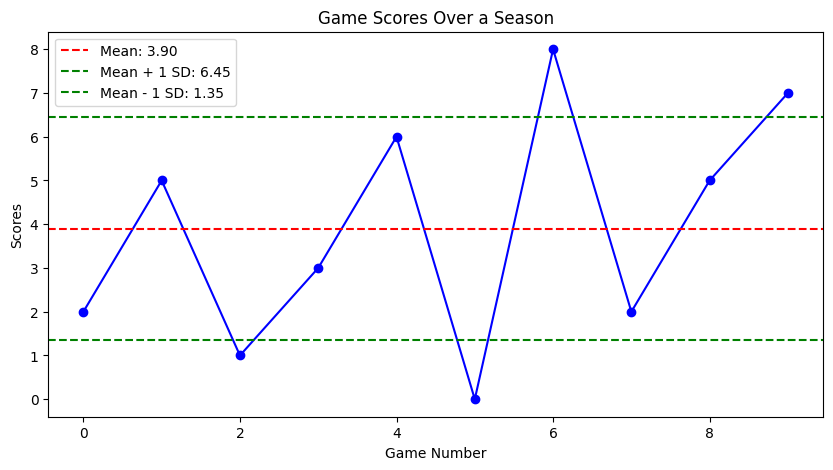

Mean Score: 3.90
Standard Deviation of Scores: 2.55


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Scores of a sports team over a season
scores = np.array([2, 5, 1, 3, 6, 0, 8, 2, 5, 7])

# Calculate mean and standard deviation
mean_scores = np.mean(scores)
std_dev_scores = np.std(scores)

# Plotting the scores
plt.figure(figsize=(10, 5))
plt.plot(scores, marker='o', linestyle='-', color='blue')
plt.axhline(y=mean_scores, color='red', linestyle='--', label=f'Mean: {mean_scores:.2f}')
plt.axhline(y=mean_scores + std_dev_scores, color='green', linestyle='--', label=f'Mean + 1 SD: {mean_scores + std_dev_scores:.2f}')
plt.axhline(y=mean_scores - std_dev_scores, color='green', linestyle='--', label=f'Mean - 1 SD: {mean_scores - std_dev_scores:.2f}')
plt.title('Game Scores Over a Season')
plt.xlabel('Game Number')
plt.ylabel('Scores')
plt.legend()
plt.show()

print(f"Mean Score: {mean_scores:.2f}")
print(f"Standard Deviation of Scores: {std_dev_scores:.2f}")


# Visualization Techniques in Python

This notebook demonstrates three fundamental data visualization techniques using Python's `matplotlib` and `seaborn` libraries, showcasing different aspects of data.

## Histograms
Histograms are used to depict the frequency distribution of numerical data, aiding in the visualization of data density and spread.

## Box Plots
Box plots are invaluable for statistical studies, as they provide a clear summary of data samples through quartiles, visually marking the median and outliers.

## Scatter Plots
Scatter plots are essential for examining the relationship between two numerical variables, helping identify correlations and trends visually.

By integrating `matplotlib` and `seaborn`, these plots not only offer insightful data analysis but also foster an intuitive understanding of statistical concepts.


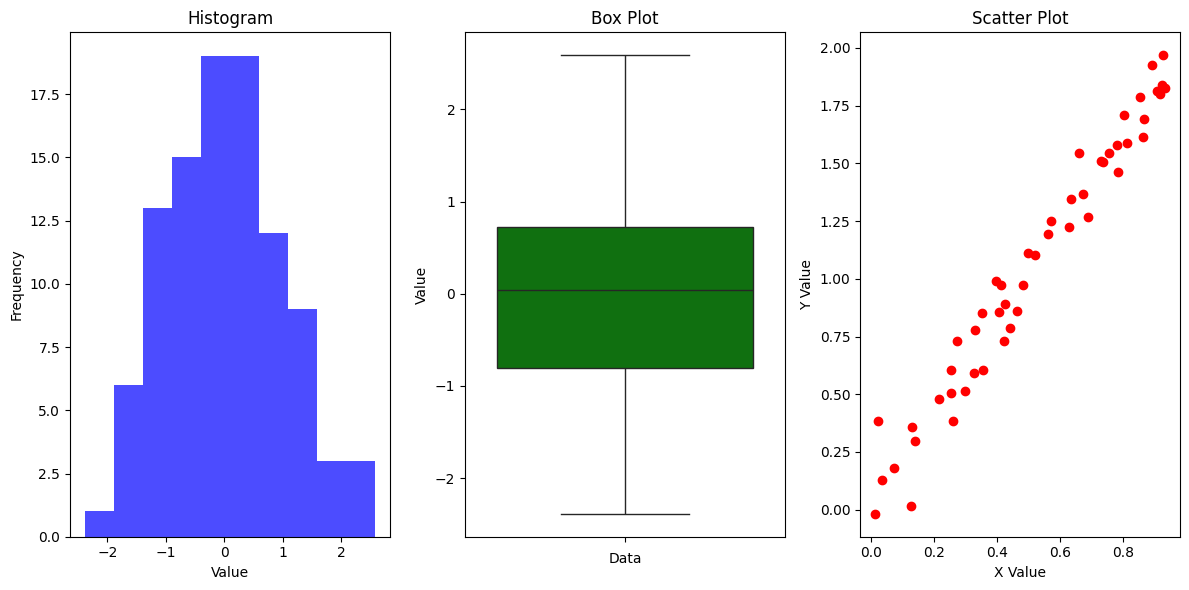

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Creating sample data
data = np.random.normal(size=100)  # Sample data for histogram and box plot
x = np.random.rand(50)
y = x * 2 + np.random.normal(0, 0.1, 50)  # Related variables for scatter plot

# Histogram
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.hist(data, bins=10, color='blue', alpha=0.7)
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(132)
sns.boxplot(data=data, color='green')
plt.title('Box Plot')
plt.xlabel('Data')
plt.ylabel('Value')

# Scatter Plot
plt.subplot(133)
plt.scatter(x, y, color='red')
plt.title('Scatter Plot')
plt.xlabel('X Value')
plt.ylabel('Y Value')

plt.tight_layout()
plt.show()


## Fundamentals of Probability

This section introduces basic concepts of probability, including how it is defined, calculated, and represented visually.

### Key Concepts
1. **Probability Definitions**: Explains how probability quantifies the likelihood of events.
2. **Rules of Probability**:
   - **Addition and Multiplication Rules**: Describe how to calculate probabilities for combined events.
   - **Complementary Probabilities**: Explain the probability of events not occurring.
3. **Probability Scale**: Discusses the 0 to 1 scale, interpreting different values.
4. **Visual Aids**:
   - **Diagrams and Probability Trees**: Enhance understanding of probability distributions and event relationships.

### Visual Representation
The provided Python script creates a bar chart to visually demonstrate different levels of event likelihood on the probability scale.


**Visualizing the Probability Scale: From Impossibility to Certainty** The following Python script uses `matplotlib` to visualize the probability scale, ranging from 0 (impossible) to 1 (certain). By plotting a bar chart, it assigns colors to various levels of event likelihood (from 'Impossible' to 'Certain'), helping to illustrate how different probabilities are visually represented. This graphical approach makes it easier to grasp the concept of probability as a measure from impossibility to certainty.


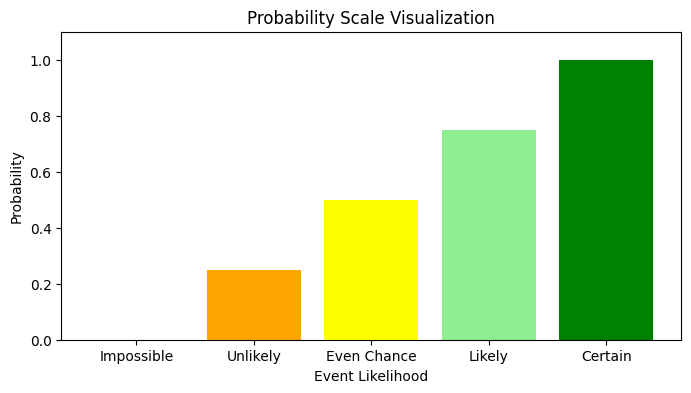

In [14]:
import matplotlib.pyplot as plt

# Define probabilities
probabilities = {'Impossible': 0, 'Unlikely': 0.25, 'Even Chance': 0.5, 'Likely': 0.75, 'Certain': 1}

# Create a bar chart
plt.figure(figsize=(8, 4))
plt.bar(probabilities.keys(), probabilities.values(), color=['red', 'orange', 'yellow', 'lightgreen', 'green'])
plt.xlabel('Event Likelihood')
plt.ylabel('Probability')
plt.title('Probability Scale Visualization')
plt.ylim(0, 1.1)  # Extend y-axis to make space for labels
plt.show()


## Explanation of the Code and Applications

### Binomial Distribution
This example models the scenario of flipping a coin 10 times, where each flip has a 50% chance of coming up heads. The histogram represents the distribution of the number of heads across 1000 trials, illustrating how frequently different counts of heads occur.

### Poisson Distribution
This distribution is used to simulate the situation of receiving a number of emails per day, with an average rate of 3 emails per day. The histogram displays the frequency of different email counts over 1000 days, providing insights into the variability and likelihood of receiving certain numbers of emails.

### Normal Distribution
The normal distribution in this example is applied to model measurement errors in physics, which are often normally distributed. This setup assumes a mean (average) of 0 and a standard deviation of 1, depicting the spread and concentration of error values around the mean across a sample of 1000 measurements.

### Uniform Distribution
Illustrated here is the uniform distribution over an interval from 0 to 1, akin to randomly selecting a cut point along a log that is exactly 1 meter long. Each point within this interval is equally likely to be chosen. The histogram shows a uniform spread across the interval, highlighting the equal probability of any single value being selected.


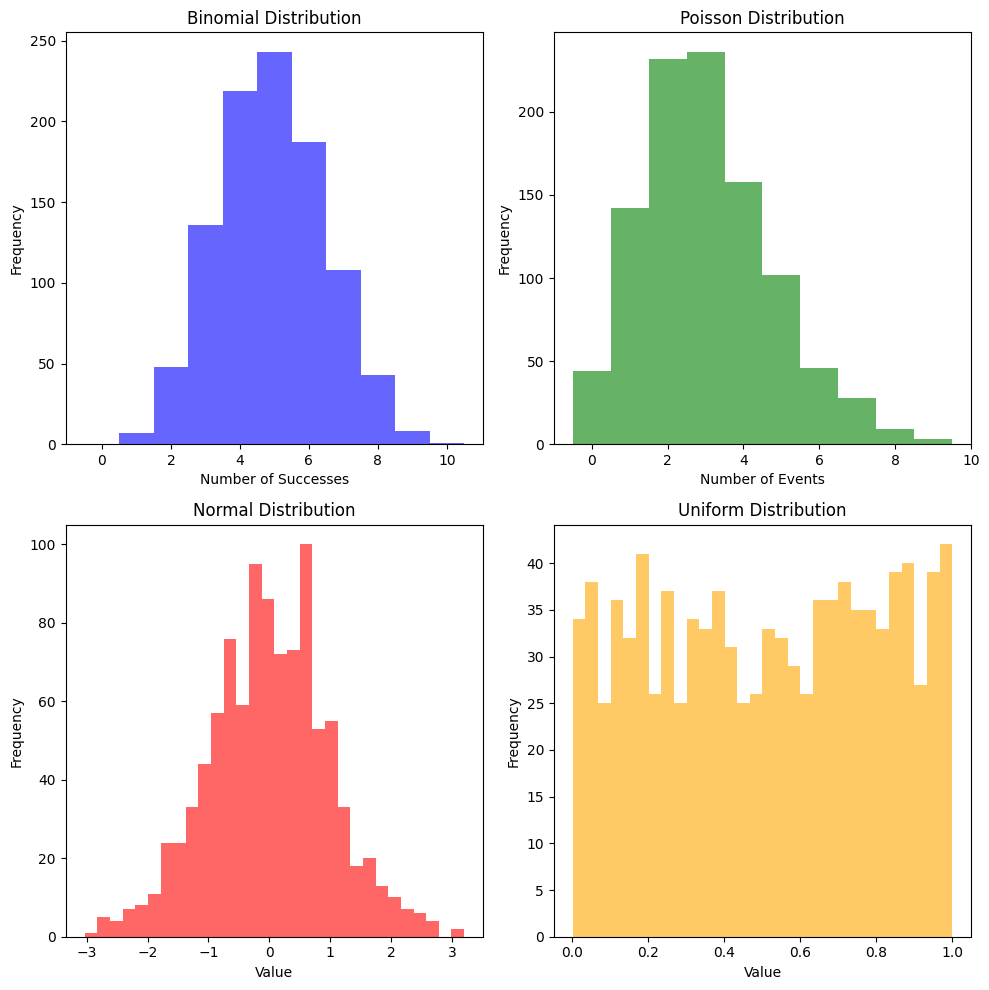

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, norm, uniform

# Set the parameters for the distributions
n, p = 10, 0.5  # Parameters for Binomial distribution (e.g., 10 coin flips, 50% chance of heads)
lambda_ = 3  # Parameter for Poisson distribution (e.g., average 3 emails per day)
mu, sigma = 0, 1  # Parameters for Normal distribution (mean = 0, std dev = 1)
a, b = 0, 1  # Parameters for Uniform distribution (range from 0 to 1)

# Generate data from each distribution
data_binomial = binom.rvs(n, p, size=1000)
data_poisson = poisson.rvs(lambda_, size=1000)
data_normal = norm.rvs(mu, sigma, size=1000)
data_uniform = uniform.rvs(a, b, size=1000)

# Plot the distributions
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].hist(data_binomial, bins=np.arange(-0.5, n+1.5, 1), alpha=0.6, color='blue')
axes[0, 0].set_title('Binomial Distribution')
axes[0, 0].set_xlabel('Number of Successes')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(data_poisson, bins=np.arange(-0.5, max(data_poisson)+1.5, 1), alpha=0.6, color='green')
axes[0, 1].set_title('Poisson Distribution')
axes[0, 1].set_xlabel('Number of Events')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(data_normal, bins=30, alpha=0.6, color='red')
axes[1, 0].set_title('Normal Distribution')
axes[1, 0].set_xlabel('Value')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(data_uniform, bins=30, alpha=0.6, color='orange')
axes[1, 1].set_title('Uniform Distribution')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

